In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension (CNN expects HxWxC)
x_train = np.expand_dims(x_train, -1)   # shape: (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

# To *encourage* overfitting in the baseline, use a smaller subset of data
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

print(x_train_small.shape, y_train_small.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(10000, 28, 28, 1) (10000,)


In [ ]:
def plot_history(history, title_prefix=""):
    hist = history.history
    epochs = range(1, len(hist["loss"]) + 1)

    plt.figure(figsize=(12,4))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(epochs, hist["loss"], label="Train loss")
    plt.plot(epochs, hist["val_loss"], label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, hist["accuracy"], label="Train acc")
    plt.plot(epochs, hist["val_accuracy"], label="Val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def create_cnn_model(l2_lambda=0.0, dropout_rate=0.0):
    reg = regularizers.l2(l2_lambda) if l2_lambda > 0 else None

    layers_list = [
        layers.Conv2D(32, (3,3), activation="relu", padding="same",
                      kernel_regularizer=reg,
                      input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation="relu", padding="same",
                      kernel_regularizer=reg),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_regularizer=reg),
    ]

    # Add Dropout only if dropout_rate is greater than 0
    if dropout_rate > 0:
        layers_list.append(layers.Dropout(dropout_rate))

    layers_list.append(layers.Dense(10, activation="softmax"))

    model = keras.Sequential(layers_list)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.5606 - loss: 1.3262 - val_accuracy: 0.7820 - val_loss: 0.5948
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.7929 - loss: 0.5524 - val_accuracy: 0.7935 - val_loss: 0.5424
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.8300 - loss: 0.4677 - val_accuracy: 0.8215 - val_loss: 0.5012
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8577 - loss: 0.4131 - val_accuracy: 0.8590 - val_loss: 0.4161
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.8729 - loss: 0.3582 - val_accuracy: 0.8645 - val_loss: 0.3797
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8735 - loss: 0.3478 - val_accuracy: 0.8390 - val_loss: 0.4390
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.8992 - loss: 0.2937 - val_accuracy: 0.8670 - val_loss: 0.3858
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8994 - loss: 0.3026 - val_accuracy

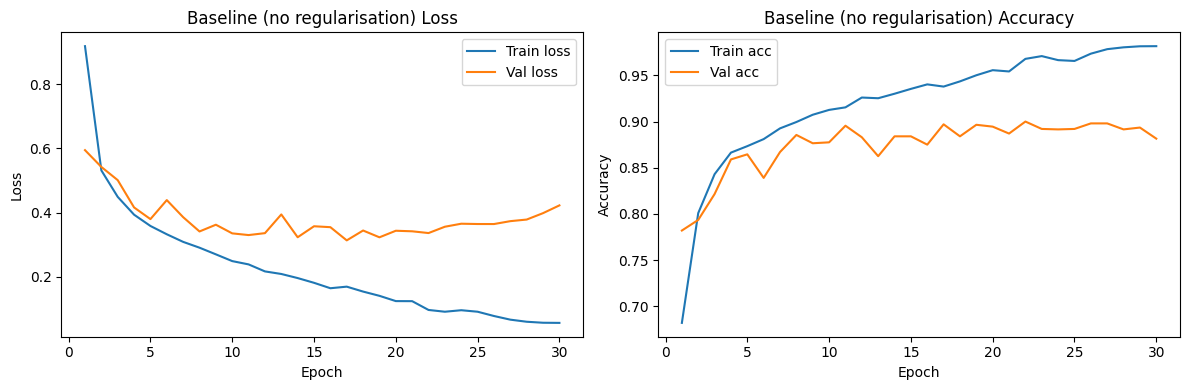

In [ ]:
baseline_model = create_cnn_model(l2_lambda=0.0, dropout_rate=0.0)
baseline_model.summary()

history_baseline = baseline_model.fit(
    x_train_small, y_train_small,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Figure 1: Baseline Overfitting Behaviour
plot_history(history_baseline, title_prefix="Baseline (no regularisation)")


In [ ]:
test_loss_base, test_acc_base = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline test accuracy: {test_acc_base:.4f}")


Baseline test accuracy: 0.8796


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.4546 - loss: 1.4815 - val_accuracy: 0.7640 - val_loss: 0.6378
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.7551 - loss: 0.6701 - val_accuracy: 0.8070 - val_loss: 0.5066
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.8014 - loss: 0.5664 - val_accuracy: 0.8390 - val_loss: 0.4631
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8317 - loss: 0.4850 - val_accuracy: 0.8575 - val_loss: 0.4168
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8379 - loss: 0.4476 - val_accuracy: 0.8580 - val_loss: 0.3935
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8504 - loss: 0.4337 - val_accuracy: 0.8630 - val_loss: 0.3839
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.8624 - loss: 0.3811 - val_accuracy: 0.8490 - val_loss: 0.3910
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.8638 - loss: 0.3690 - val_accuracy:

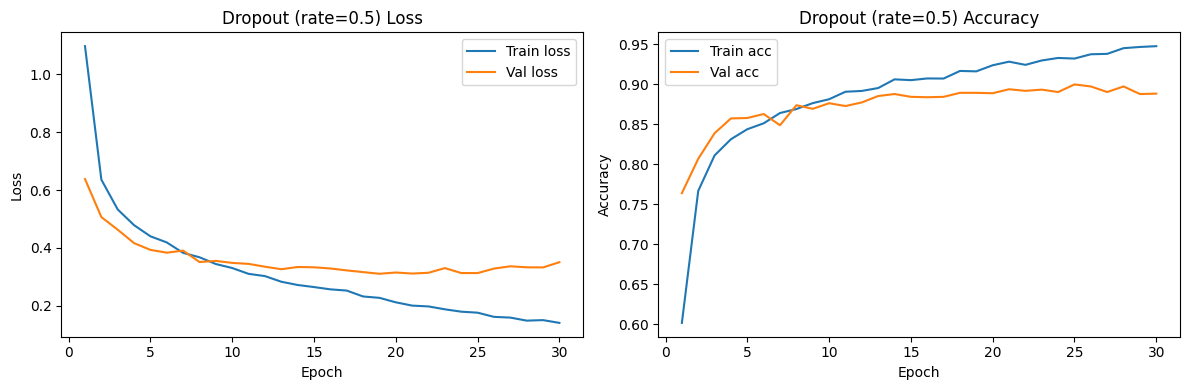

Dropout model test accuracy: 0.8865


In [ ]:
#Dropout
dropout_model = create_cnn_model(l2_lambda=0.0, dropout_rate=0.5)

history_dropout = dropout_model.fit(
    x_train_small, y_train_small,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

plot_history(history_dropout, title_prefix="Dropout (rate=0.5)")

test_loss_dropout, test_acc_dropout = dropout_model.evaluate(x_test, y_test, verbose=0)

# Figure 3: L2 Regularization
print(f"Dropout model test accuracy: {test_acc_dropout:.4f}")


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.5483 - loss: 1.5756 - val_accuracy: 0.7735 - val_loss: 0.8106
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.7895 - loss: 0.7777 - val_accuracy: 0.8095 - val_loss: 0.7075
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.8302 - loss: 0.6648 - val_accuracy: 0.8380 - val_loss: 0.6173
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.8599 - loss: 0.5693 - val_accuracy: 0.8515 - val_loss: 0.5771
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8600 - loss: 0.5518 - val_accuracy: 0.8575 - val_loss: 0.5414
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.8752 - loss: 0.5009 - val_accuracy: 0.8420 - val_loss: 0.5835
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.8810 - loss: 0.4809 - val_accuracy: 0.8670 - val_loss: 0.5236
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8863 - loss: 0.4603 - val_accuracy

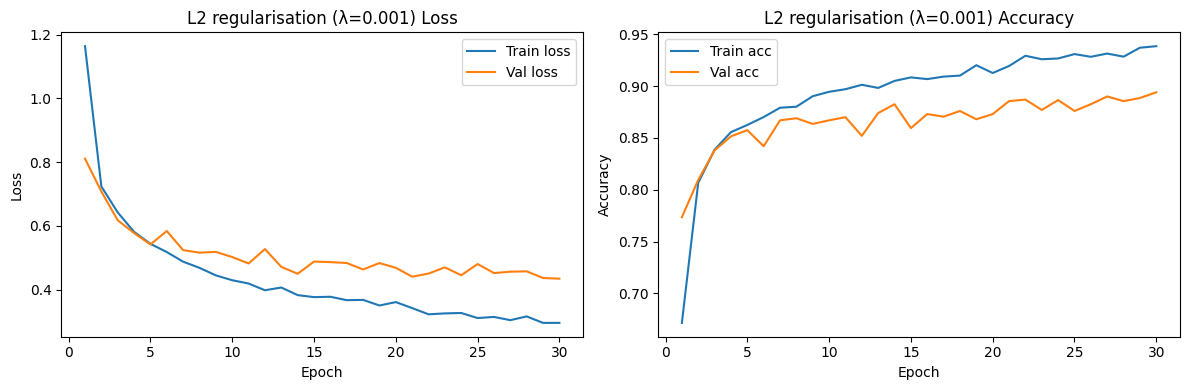

L2 model test accuracy: 0.8828


In [ ]:
#Weight Decay
l2_model = create_cnn_model(l2_lambda=0.001, dropout_rate=0.0)

history_l2 = l2_model.fit(
    x_train_small, y_train_small,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

plot_history(history_l2, title_prefix="L2 regularisation (λ=0.001)")

test_loss_l2, test_acc_l2 = l2_model.evaluate(x_test, y_test, verbose=0)

# Figure 2: L2 Regularization
print(f"L2 model test accuracy: {test_acc_l2:.4f}")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.4628 - loss: 1.7209 - val_accuracy: 0.7665 - val_loss: 0.8224
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.7423 - loss: 0.8825 - val_accuracy: 0.8060 - val_loss: 0.7010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.7980 - loss: 0.7290 - val_accuracy: 0.8190 - val_loss: 0.6472
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.8044 - loss: 0.7033 - val_accuracy: 0.8485 - val_loss: 0.5844
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.8396 - loss: 0.6226 - val_accuracy: 0.8515 - val_loss: 0.5669
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.8423 - loss: 0.5936 - val_accuracy: 0.8345 - val_loss: 0.5696
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.8553 - loss: 0.5627 - val_accuracy: 0.8620 - val_loss: 0.5273
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.8582 - loss: 0.5500 - val_accuracy: 0.8550 - 

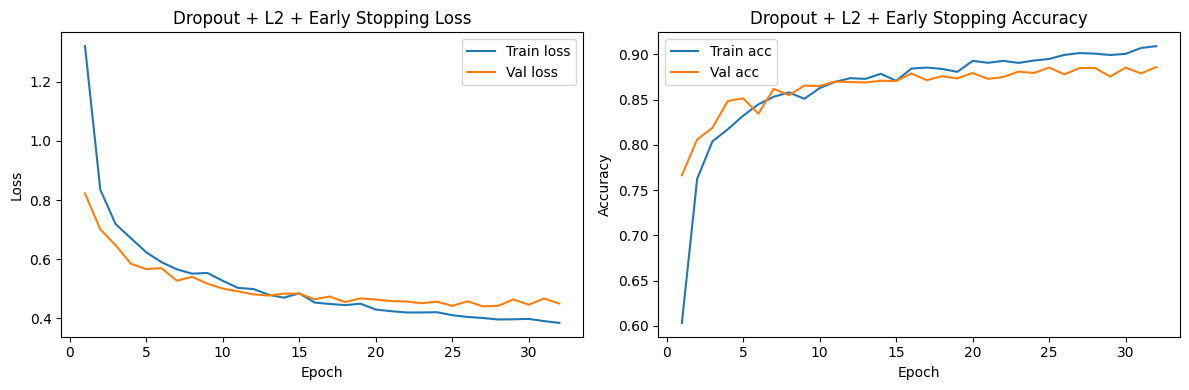

Early-stopped model test accuracy: 0.8832


In [ ]:
#Early Stopping
earlystop_model = create_cnn_model(l2_lambda=0.001, dropout_rate=0.5)

early_stop_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,            # stop if val_loss doesn’t improve for 3 epochs
    restore_best_weights=True
)

history_early = earlystop_model.fit(
    x_train_small, y_train_small,
    epochs=50,            # allow many epochs, callback will stop early
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop_cb],
    verbose=1
)

# Figure 4: Early Stopping

plot_history(history_early, title_prefix="Dropout + L2 + Early Stopping")

test_loss_early, test_acc_early = earlystop_model.evaluate(x_test, y_test, verbose=0)
print(f"Early-stopped model test accuracy: {test_acc_early:.4f}")


In [ ]:
#Quantisation
import pathlib

# Convert to TensorFlow Lite with dynamic range quantisation
converter = tf.lite.TFLiteConverter.from_keras_model(earlystop_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save to file
tflite_model_path = pathlib.Path("cnn_fashion_quantized.tflite")
tflite_model_path.write_bytes(tflite_model)

print("Quantised model size (bytes):", len(tflite_model))


Saved artifact at '/tmp/tmpq2blykiy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_32')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135119013739216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119255664016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119013737296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119013736912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119013737872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119197372688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119197374608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135119197374416: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantised model size (bytes): 429040
